In [2]:
import matplotlib.pyplot as plt

from data import get_data
from reduction.PCA import pca, plot_explained_var


%load_ext autoreload
%autoreload 2

# PCA

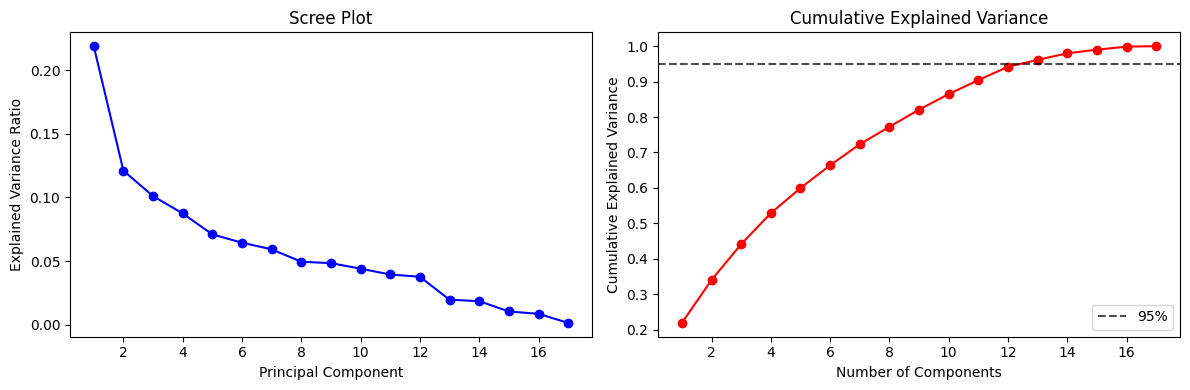

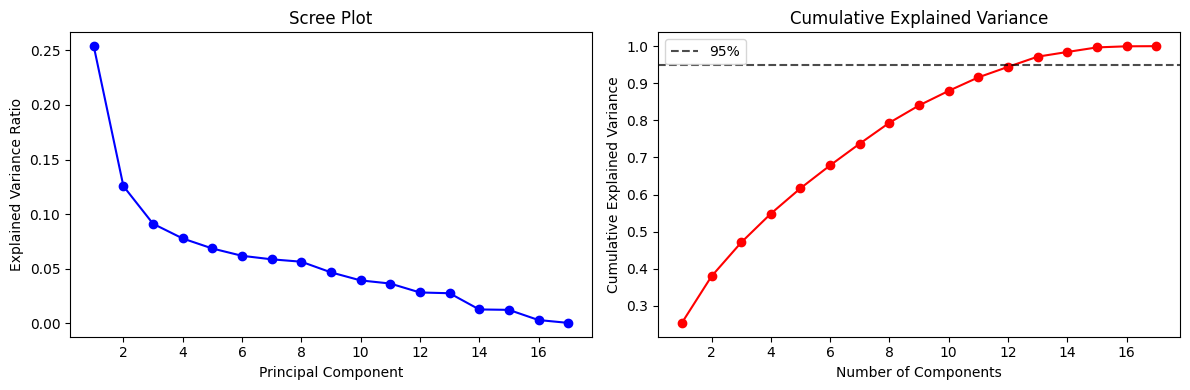

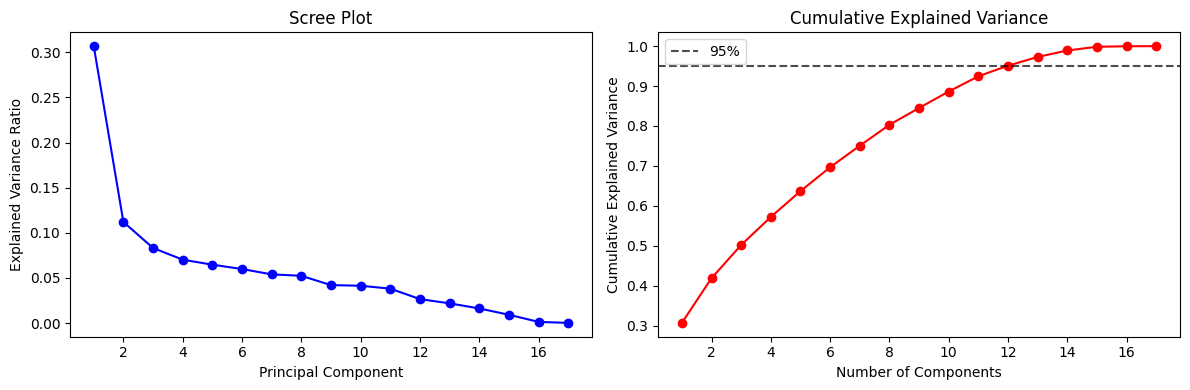

In [3]:
df_c1, X_c1 = get_data(channel=1)
fig = plot_explained_var(X_c1)
plt.show()

df_c2, X_c2 = get_data(channel=2)
fig = plot_explained_var(X_c2)
plt.show()

df, X = get_data()
fig = plot_explained_var(X)
plt.show()

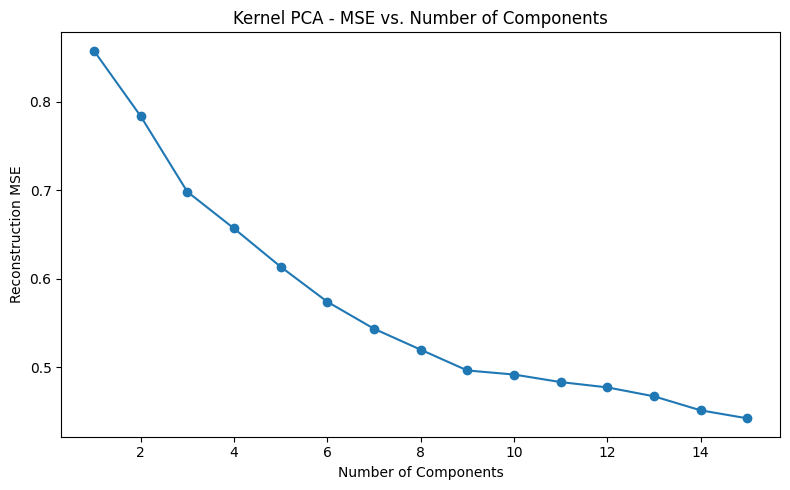

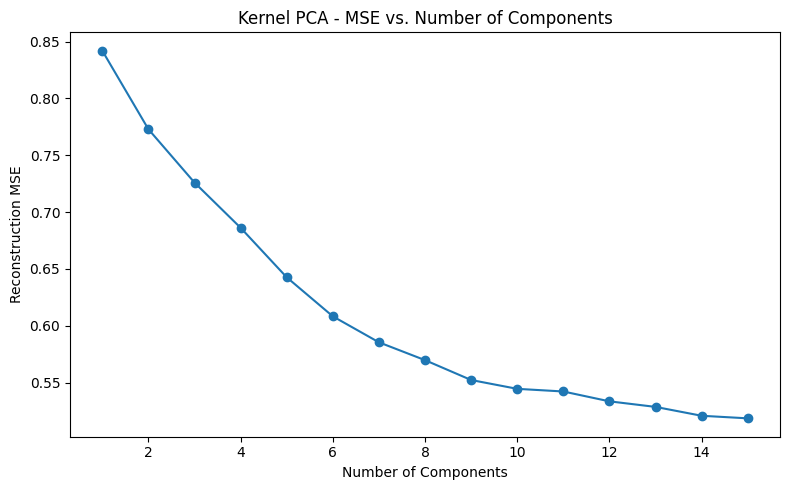

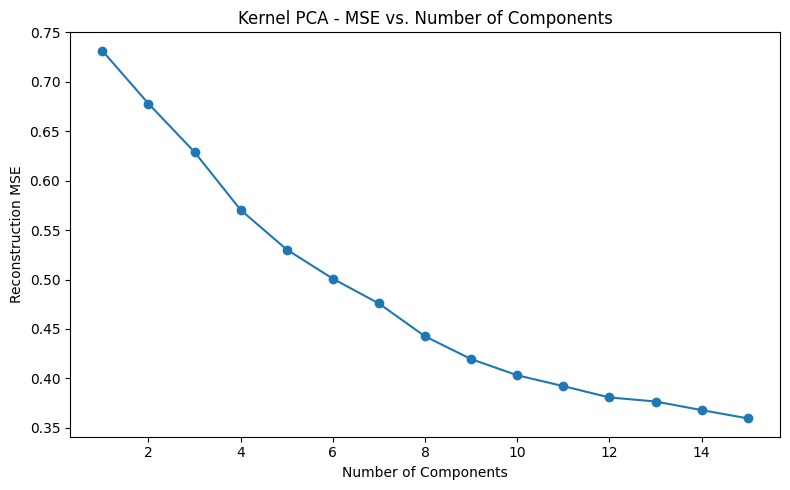

In [4]:
from reduction.kPCA import kpca, plot_kpca_mse_vs_pc

plot_kpca_mse_vs_pc(X_c1)
plot_kpca_mse_vs_pc(X_c2)
plot_kpca_mse_vs_pc(X)

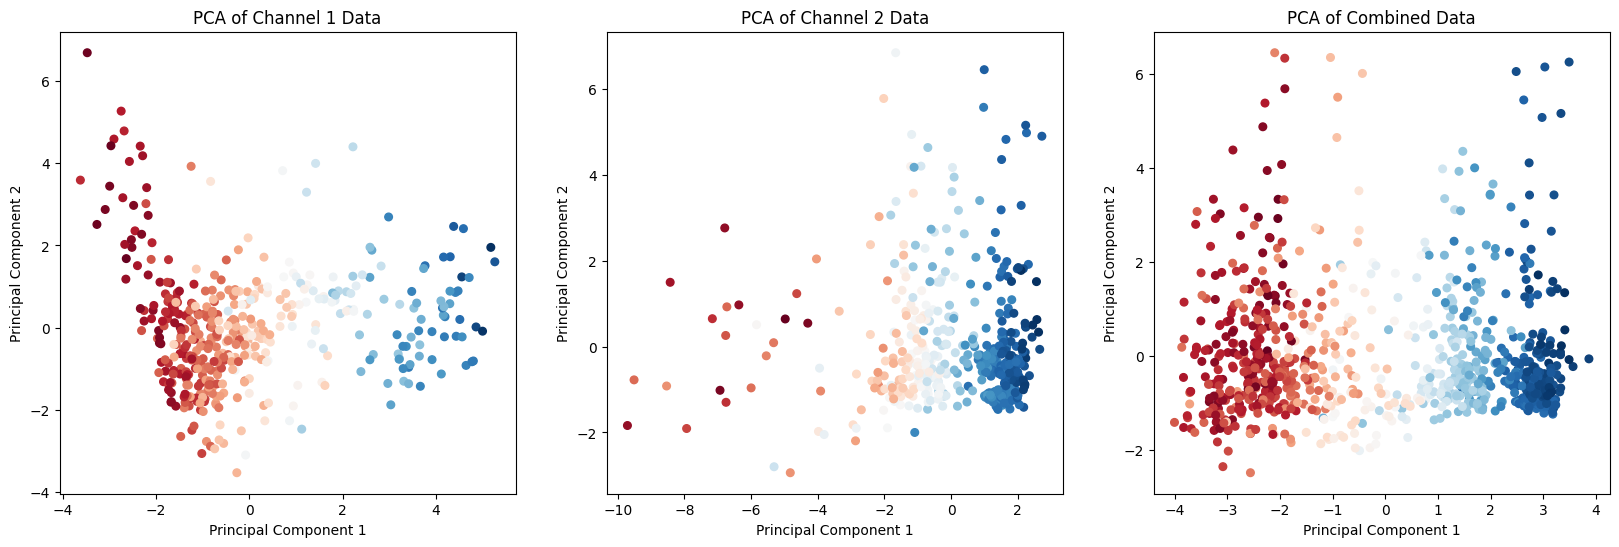

In [30]:
n_components = 12
X_c1_PCA = pca(X_c1, n_components=n_components)
X_c2_PCA = pca(X_c2, n_components=n_components)
X_PCA = pca(X, n_components=n_components)

metric = 4
# 3, 4, 5, 8, (11),
# Color by first column of df_c1
# plt.figure(figsize=(10, 6))

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("PCA of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(
    X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1.iloc[:, metric], cmap="RdBu", s=30
)

axs[1].set_title("PCA of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(
    X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2.iloc[:, metric], cmap="RdBu", s=30
)

axs[2].set_title("PCA of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df.iloc[:, metric], cmap="RdBu", s=30)

plt.show()

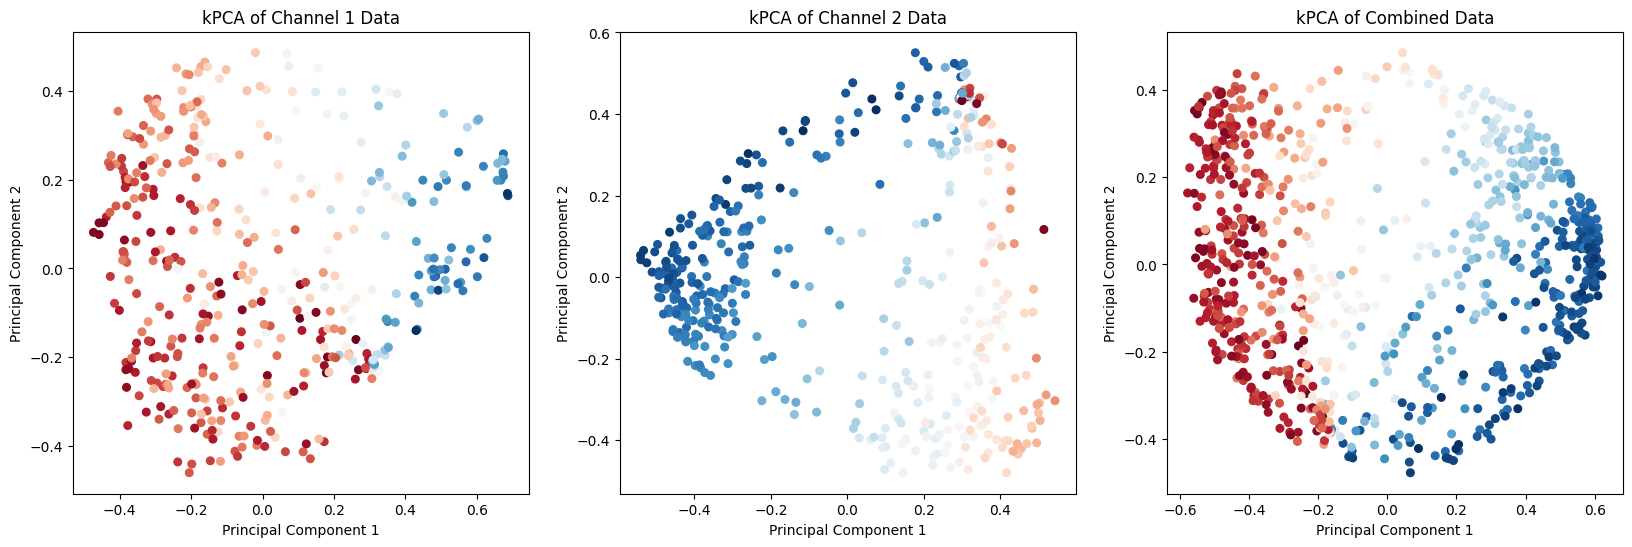

In [31]:
from reduction.kPCA import kpca, plot_kpca_mse_vs_pc

n_components = 9
X_c1_kPCA = kpca(X_c1, n_components=n_components)
X_c2_kPCA = kpca(X_c2, n_components=n_components)
X_kPCA = kpca(X, n_components=n_components)

# Color by first column of df_c1
# plt.figure(figsize=(10, 6))

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("kPCA of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(
    X_c1_kPCA[:, 0], X_c1_kPCA[:, 1], c=df_c1.iloc[:, metric], cmap="RdBu", s=30
)

axs[1].set_title("kPCA of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(
    X_c2_kPCA[:, 0], X_c2_kPCA[:, 1], c=df_c2.iloc[:, metric], cmap="RdBu", s=30
)

axs[2].set_title("kPCA of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_kPCA[:, 0], X_kPCA[:, 1], c=df.iloc[:, metric], cmap="RdBu", s=30)

plt.show()

In [32]:
from reduction.compare import evaluate_embeddings


results = evaluate_embeddings(X_c1, X_c1_PCA, X_c1_kPCA)
results = evaluate_embeddings(X_c2, X_c2_PCA, X_c2_kPCA)
results = evaluate_embeddings(X, X_PCA, X_kPCA)

Distance preservation (Spearman ρ, ↑ better):
  PCA  : 0.9960
  kPCA : 0.3812

K‑NN overlap (k=10, ↑ better):
  PCA  : 0.8581
  kPCA : 0.5778

🏆  **PCA embedding wins** (lower rank total)
Distance preservation (Spearman ρ, ↑ better):
  PCA  : 0.9985
  kPCA : 0.5836

K‑NN overlap (k=10, ↑ better):
  PCA  : 0.8799
  kPCA : 0.6297

🏆  **PCA embedding wins** (lower rank total)
Distance preservation (Spearman ρ, ↑ better):
  PCA  : 0.9962
  kPCA : 0.4914

K‑NN overlap (k=10, ↑ better):
  PCA  : 0.8310
  kPCA : 0.5072

🏆  **PCA embedding wins** (lower rank total)


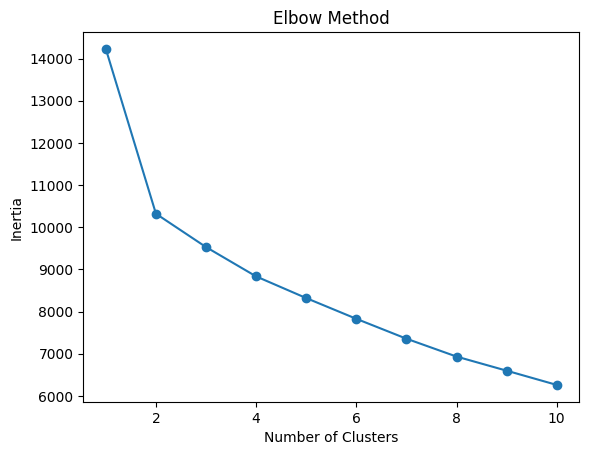

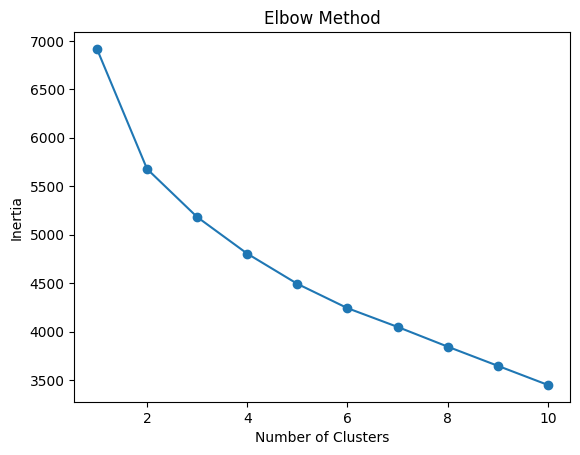

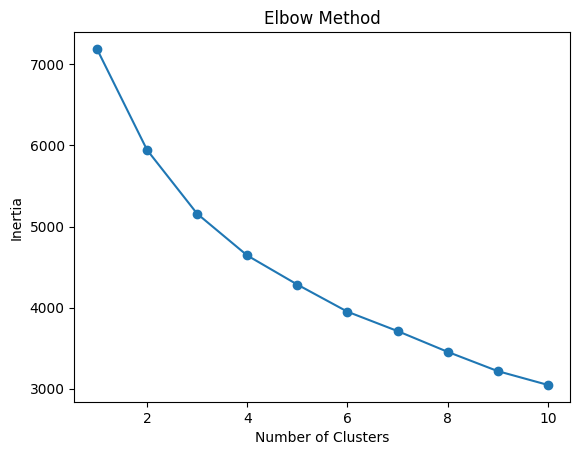

In [34]:
from clustering.kmeans import plot_kmeans_elbow

plot_kmeans_elbow(X_PCA, max_k=10)
plot_kmeans_elbow(X_c1_PCA, max_k=10)
plot_kmeans_elbow(X_c2_PCA, max_k=10)

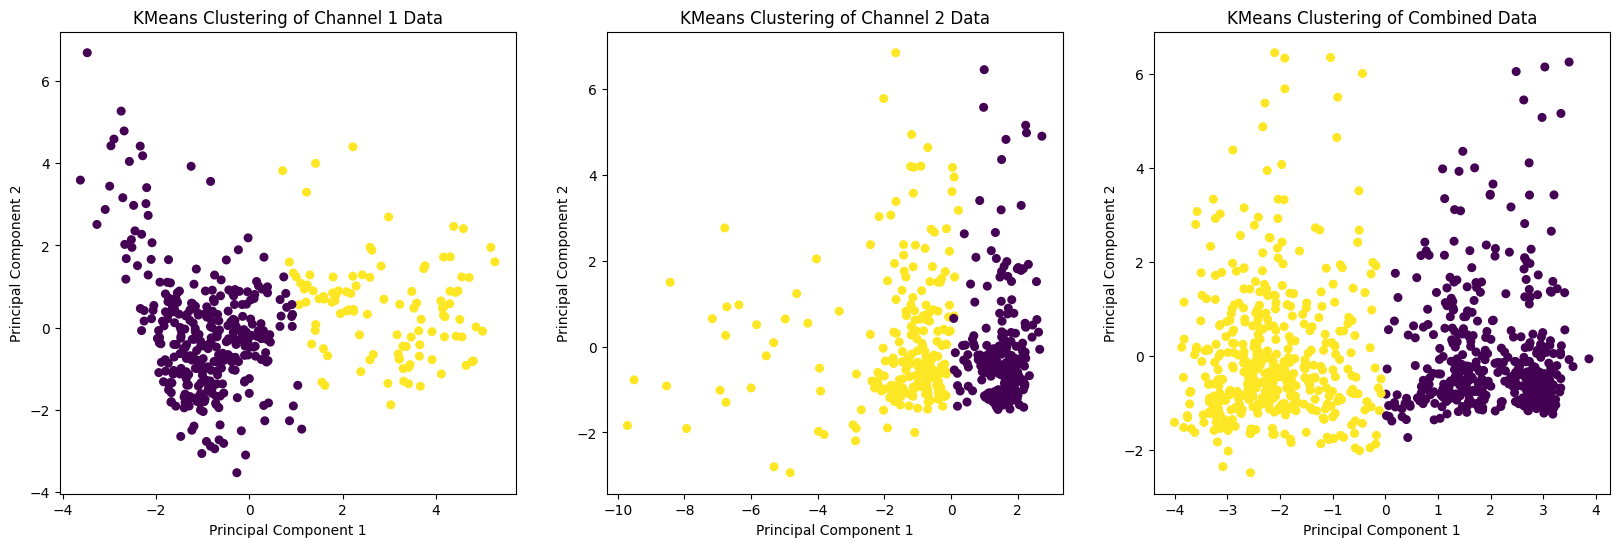

In [53]:
from clustering.kmeans import kmeans

k = 2
model, df_c1["cluster"] = kmeans(X_c1_PCA, k=k)
model, df_c2["cluster"] = kmeans(X_c2_PCA, k=k)
model, df["cluster"] = kmeans(X_PCA, k=k)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("KMeans Clustering of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1["cluster"], cmap="viridis", s=30)

axs[1].set_title("KMeans Clustering of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2["cluster"], cmap="viridis", s=30)

axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df["cluster"], cmap="viridis", s=30)

plt.show()

Cluster 0 has 440 points
Cluster 1 has 320 points
Cluster 2 has 120 points


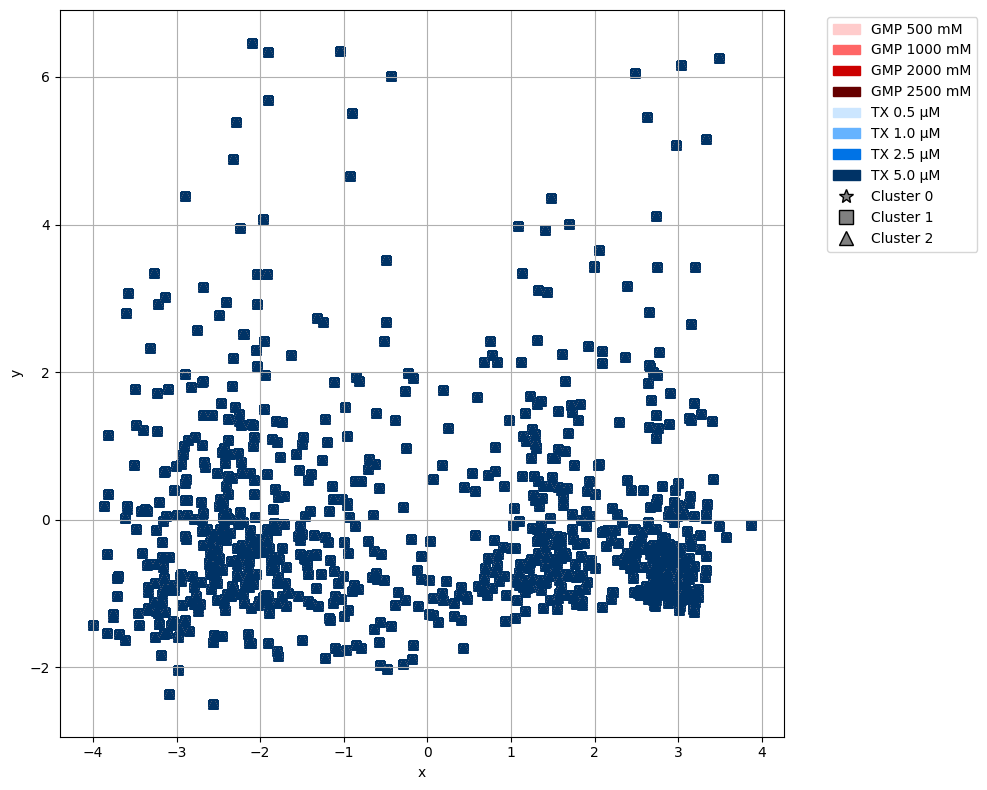

In [52]:
# Color + marker mapping
cluster_markers = {0: "*", 1: "s", 2: "^"}
gmp_color_map = {500: "#ffcccc", 1000: "#ff6666", 2000: "#cc0000", 2500: "#660000"}
tx_color_map = {0.5: "#cce6ff", 1.0: "#66b3ff", 2.5: "#0073e6", 5.0: "#003366"}

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for cluster_id in sorted(df["cluster"].unique()):
    marker = cluster_markers.get(cluster_id, "x")
    cluster_df = df[df["cluster"] == cluster_id]
    print(f"Cluster {cluster_id} has {len(cluster_df)} points")

    for _, row in cluster_df.iterrows():
        # x, y = row["UMAP_X"], row["UMAP_Y"]
        name = row.get("stab_name", "")
        conc = row.get("stab_conc_uM", None)

        if name == "GMP" and conc in gmp_color_map:
            color = gmp_color_map[conc]
        elif name == "TX" and conc in tx_color_map:
            color = tx_color_map[conc]
        else:
            color = "gray"

        plt.scatter(X_PCA[:, 0], X_PCA[:, 1], color=color, marker=marker, alpha=0.8)

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

legend_elements = (
    [
        mpatches.Patch(color=color, label=f"GMP {c} mM")
        for c, color in gmp_color_map.items()
    ]
    + [
        mpatches.Patch(color=color, label=f"TX {c} µM")
        for c, color in tx_color_map.items()
    ]
    + [
        Line2D(
            [0],
            [0],
            marker=mk,
            color="w",
            label=f"Cluster {cid}",
            markerfacecolor="gray",
            markersize=10,
            markeredgecolor="black",
        )
        for cid, mk in cluster_markers.items()
    ]
)

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(-35, 35)
# plt.ylim(-35, 35)
# plt.title(f"K-Means Clustering (k={k_opt}) {title_suffix}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df["stab_name"].unique()

array(['TX', 'GMP'], dtype=object)

In [48]:
df["stab_conc_uM"].unique()

array([5.0e+00, 5.0e-01, 1.0e+00, 2.5e+03, 2.5e+00, 5.0e+02, 1.0e+03,
       2.0e+03])

KeyError: 'Mode'

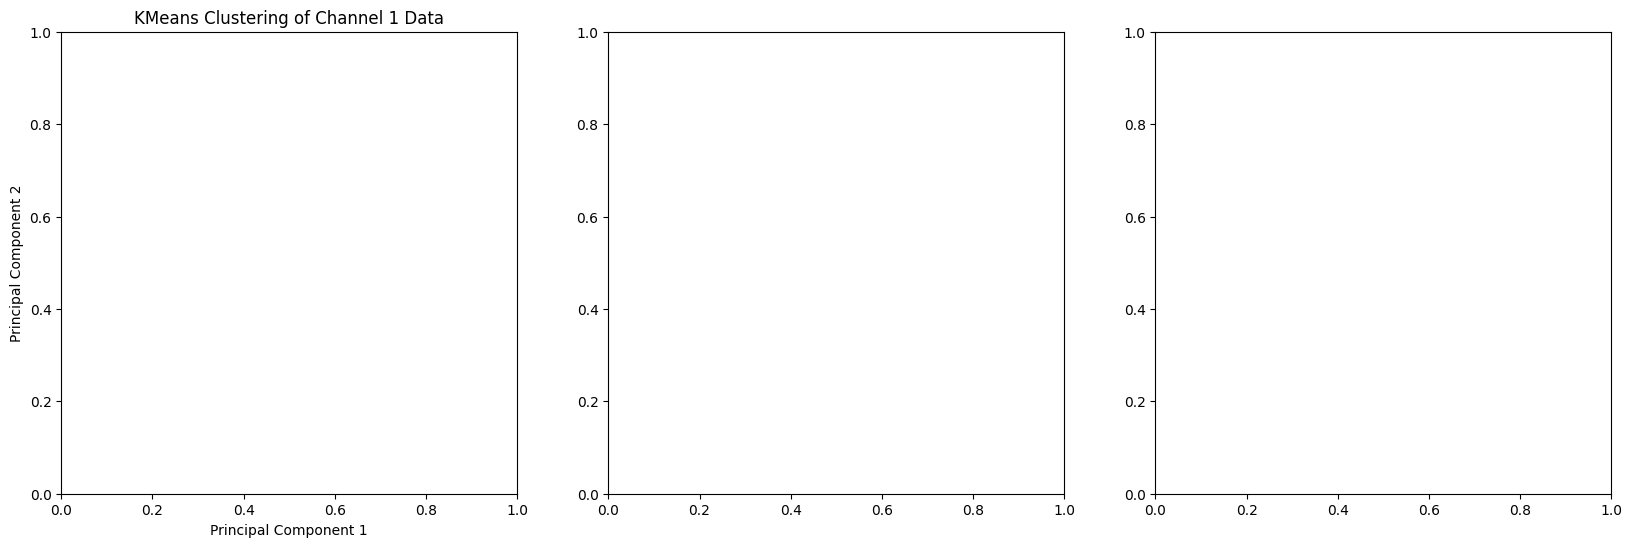

In [41]:
from clustering.kmeans import kmeans
import matplotlib.pyplot as plt
import numpy as np

k = 2

# Define symbols for each cluster
symbols = ["o", "^", "s", "D"]
# Define colors for each mode
mode_colors = ["blue", "purple", "orange", "magenta"]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Channel 1
axs[0].set_title("KMeans Clustering of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df_c1["cluster"] == cluster_id
    modes = np.array(df_c1[mask]["Mode"], dtype=int)
    # Use list comprehension to map mode values to colors

    point_colors = [mode_colors[mode] for mode in modes]
    axs[0].scatter(
        X_c1_PCA[mask, 0],
        X_c1_PCA[mask, 1],
        marker=symbols[cluster_id],
        c=point_colors,  # Changed from color= to c=
        s=50,
        alpha=0.7,
        label=f"Cluster {cluster_id}",
    )
axs[0].legend()

# Channel 2
axs[1].set_title("KMeans Clustering of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df_c2["cluster"] == cluster_id
    modes = np.array(df_c2[mask]["Mode"], dtype=int)
    # Use list comprehension to map mode values to colors
    point_colors = [mode_colors[mode] for mode in modes]
    axs[1].scatter(
        X_c2_PCA[mask, 0],
        X_c2_PCA[mask, 1],
        marker=symbols[cluster_id],
        c=point_colors,  # Changed from color= to c=
        s=50,
        alpha=0.7,
        label=f"Cluster {cluster_id}",
    )
axs[1].legend()

# Combined
axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df["cluster"] == cluster_id
    modes = np.array(df[mask]["Mode"], dtype=int)
    # Use list comprehension to map mode values to colors
    point_colors = [mode_colors[mode] for mode in modes]
    axs[2].scatter(
        X_PCA[mask, 0],
        X_PCA[mask, 1],
        marker=symbols[cluster_id],
        c=point_colors,  # Color by mode instead of cluster
        s=50,
        alpha=0.7,
        label=f"Cluster {cluster_id}",
    )
axs[2].legend()

plt.tight_layout()
plt.show()

In [42]:
df

,Filename,Channel,Flags,Connectivity,Maximum Island Area,Maximum Void Area,Island Area Change,Void Area Change,Initial Maximum Island Area,Initial 2nd Maximum Island Area,...,stab_conc_uM,stab_name,mt_conc_uM,actin_conc_uM,channel,trial,time_PT,spatial_x,spatial_y,cluster
0,5uM_TX_3.19uM-MT_2.62uM-A_C=2_trial-3_PT-6_til...,0,0,0.882048,1.364042,-1.464485,-0.091661,-0.362467,1.363703,-0.931911,...,5.0,TX,3.19,2.62,2,3,6,1,1,0
1,0.5uM_TX_3.19uM-MT_2.62uM-A_C=2_trial-1_PT-1_t...,0,0,0.882048,0.664948,-0.260251,-0.280966,0.365229,0.729267,-0.901402,...,0.5,TX,3.19,2.62,2,1,1,0,0,0
2,0.5uM_TX_3.19uM-MT_2.62uM-A_C=2_trial-1_PT-1_t...,0,0,0.882048,0.565207,-0.226374,-0.367496,0.391463,0.638280,-0.807697,...,0.5,TX,3.19,2.62,2,1,1,0,1,0
3,0.5uM_TX_3.19uM-MT_2.62uM-A_C=2_trial-1_PT-1_t...,0,0,0.882048,0.383143,0.081369,-0.449206,-0.195369,0.428862,-0.411084,...,0.5,TX,3.19,2.62,2,1,1,1,0,0
4,0.5uM_TX_3.19uM-MT_2.62uM-A_C=2_trial-1_PT-1_t...,0,0,0.882048,0.613207,-0.381868,-0.146874,-0.510549,0.599710,0.127176,...,0.5,TX,3.19,2.62,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,5uM_TX_3.19uM-MT_2.62uM-A_C=1_trial-3_PT-5_til...,0,0,-1.304822,-0.961884,0.601066,4.461127,-0.160997,-1.228929,0.987956,...,5.0,TX,3.19,2.62,1,3,5,1,0,1
876,5uM_TX_3.19uM-MT_2.62uM-A_C=1_trial-3_PT-5_til...,0,0,-1.304822,-1.112722,0.670247,1.344782,-0.047159,-1.162172,-0.049339,...,5.0,TX,3.19,2.62,1,3,5,1,1,1
877,5uM_TX_3.19uM-MT_2.62uM-A_C=1_trial-3_PT-6_til...,0,0,-1.304822,-1.197238,0.858709,0.197889,-0.170179,-1.141156,1.456482,...,5.0,TX,3.19,2.62,1,3,6,0,0,1
878,5uM_TX_3.19uM-MT_2.62uM-A_C=1_trial-3_PT-6_til...,0,0,-1.304822,-1.269495,0.905565,-1.291303,-0.153804,-1.091954,1.201516,...,5.0,TX,3.19,2.62,1,3,6,0,1,1


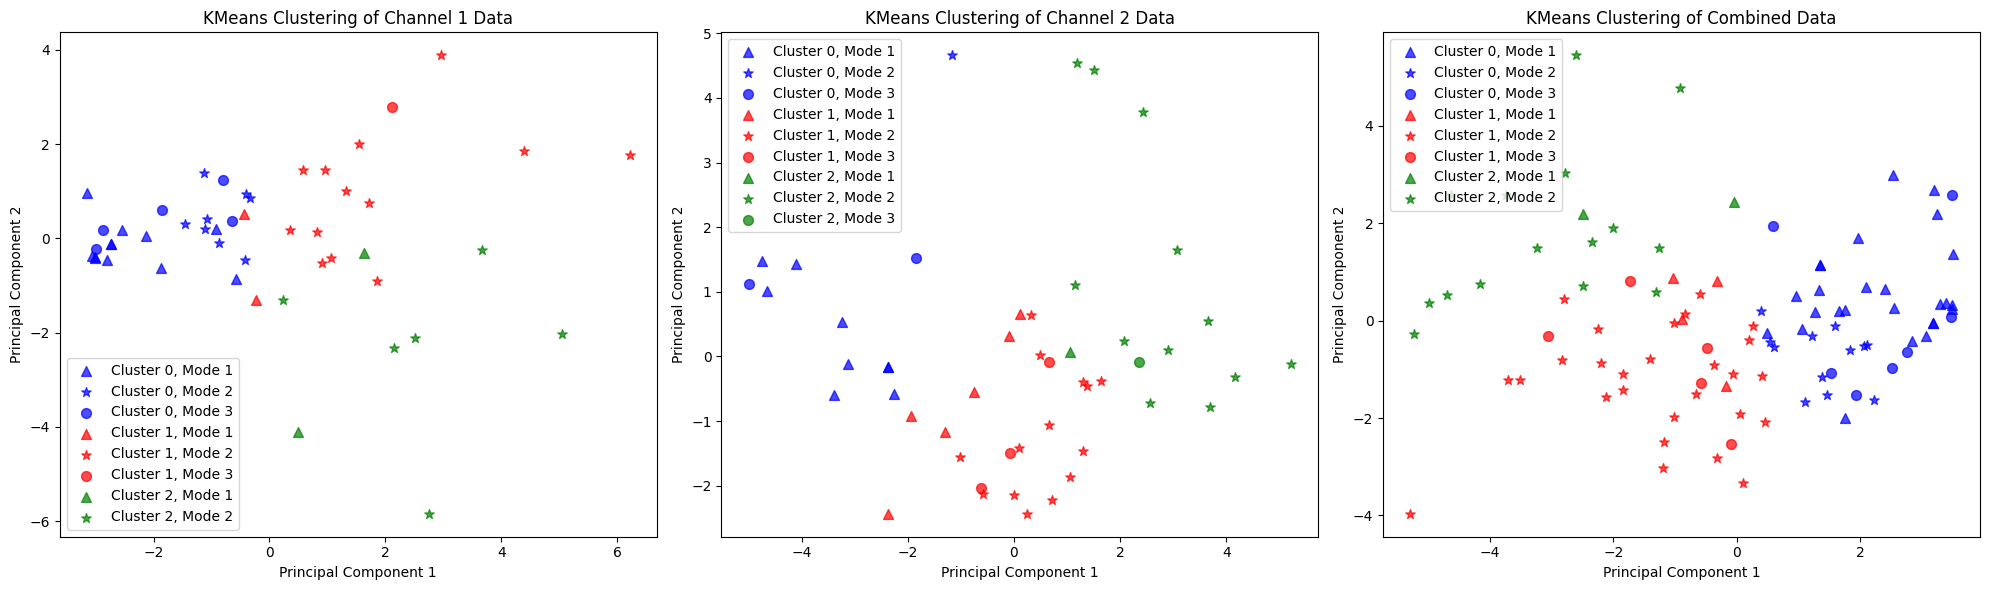

In [27]:
from clustering.kmeans import kmeans
import matplotlib.pyplot as plt
import numpy as np

k = 3
model, df_c1["cluster"] = kmeans(X_c1_PCA, k=k)
model, df_c2["cluster"] = kmeans(X_c2_PCA, k=k)
model, df["cluster"] = kmeans(X_PCA, k=k)

# Define colors for each cluster
cluster_colors = ["blue", "red", "green", "purple"]
# Define symbols for each mode
mode_symbols = ["o", "^", "*", "o"]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Channel 1
axs[0].set_title("KMeans Clustering of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df_c1["cluster"] == cluster_id
    modes = np.array(df_c1[mask]["Mode"], dtype=int)
    # Plot each mode separately within this cluster to get different symbols
    for mode in np.unique(modes):
        mode_mask = modes == mode
        cluster_points_x = X_c1_PCA[mask, 0][mode_mask]
        cluster_points_y = X_c1_PCA[mask, 1][mode_mask]
        axs[0].scatter(
            cluster_points_x,
            cluster_points_y,
            marker=mode_symbols[mode],
            color=cluster_colors[cluster_id],
            s=50,
            alpha=0.7,
            label=(
                f"Cluster {cluster_id}, Mode {mode}"
                if len(cluster_points_x) > 0
                else ""
            ),
        )
axs[0].legend()

# Channel 2
axs[1].set_title("KMeans Clustering of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df_c2["cluster"] == cluster_id
    modes = np.array(df_c2[mask]["Mode"], dtype=int)
    # Plot each mode separately within this cluster to get different symbols
    for mode in np.unique(modes):
        mode_mask = modes == mode
        cluster_points_x = X_c2_PCA[mask, 0][mode_mask]
        cluster_points_y = X_c2_PCA[mask, 1][mode_mask]
        axs[1].scatter(
            cluster_points_x,
            cluster_points_y,
            marker=mode_symbols[mode],
            color=cluster_colors[cluster_id],
            s=50,
            alpha=0.7,
            label=(
                f"Cluster {cluster_id}, Mode {mode}"
                if len(cluster_points_x) > 0
                else ""
            ),
        )
axs[1].legend()

# Combined
axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df["cluster"] == cluster_id
    modes = np.array(df[mask]["Mode"], dtype=int)
    # Plot each mode separately within this cluster to get different symbols
    for mode in np.unique(modes):
        mode_mask = modes == mode
        cluster_points_x = X_PCA[mask, 0][mode_mask]
        cluster_points_y = X_PCA[mask, 1][mode_mask]
        axs[2].scatter(
            cluster_points_x,
            cluster_points_y,
            marker=mode_symbols[mode],
            color=cluster_colors[cluster_id],
            s=50,
            alpha=0.7,
            label=(
                f"Cluster {cluster_id}, Mode {mode}"
                if len(cluster_points_x) > 0
                else ""
            ),
        )
axs[2].legend()

plt.tight_layout()
plt.show()

In [47]:
from clustering.DBSCAN import dbscan, plot_k_distance
from clustering.ward import ward_cluster, plot_dendrogram


model, labels = ward_cluster(X_PCA, n_clusters=None, distance_threshold=17)
labels
# model, labels = dbscan(X_PCA, eps=3.5, min_samples=4)
# labels

# plot_k_distance(X_c1_PCA)
# plot_k_distance(X_c2_PCA)
# plot_k_distance(X_PCA)

array([2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 0])

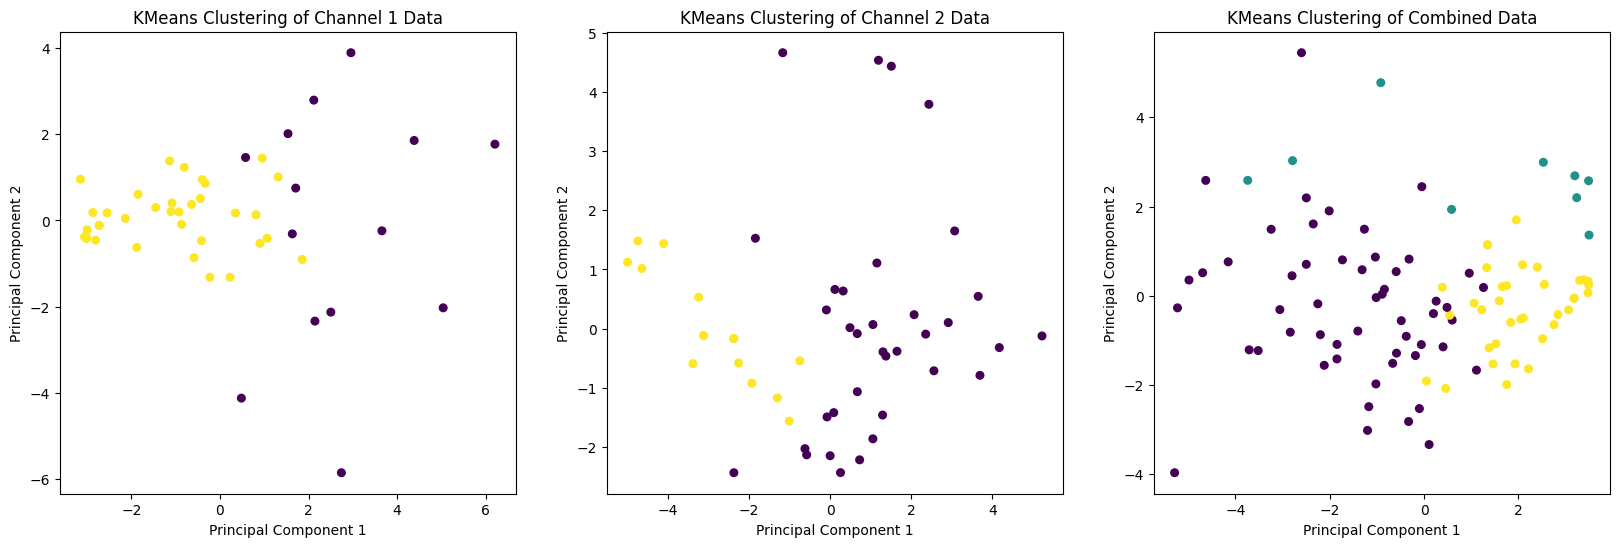

In [48]:
from clustering.kmeans import kmeans

k = 3
# model, df_c1["cluster"] = kmeans(X_c1_PCA, k=k)
# model, df_c2["cluster"] = kmeans(X_c2_PCA, k=k)
# model, df["cluster"] = kmeans(X_PCA, k=k)
model, df_c1["cluster"] = ward_cluster(X_c1_PCA, n_clusters=None, distance_threshold=17)
model, df_c2["cluster"] = ward_cluster(X_c2_PCA, n_clusters=None, distance_threshold=17)
model, df["cluster"] = ward_cluster(X_PCA, n_clusters=None, distance_threshold=17)


fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("KMeans Clustering of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1["cluster"], cmap="viridis", s=30)

axs[1].set_title("KMeans Clustering of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2["cluster"], cmap="viridis", s=30)

axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df["cluster"], cmap="viridis", s=30)

plt.show()

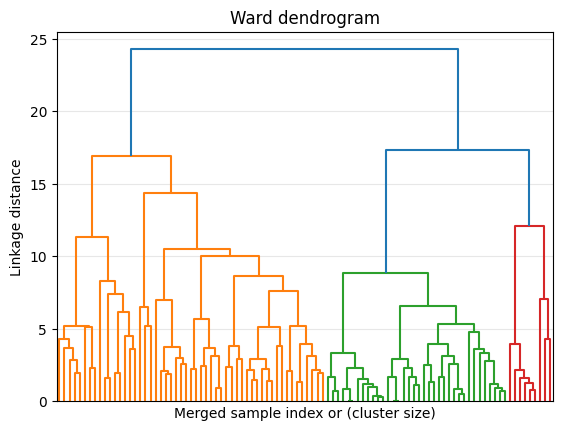

In [49]:
plot_dendrogram(X_PCA)

In [ ]:
X_c1_PCA.shape

In [ ]:
from reduction.compare import evaluate_embeddings


results = evaluate_embeddings(X_c1, X_c1_PCA, X_c1_kPCA)

In [ ]:
from clustering.HDBSCAN import optimize_hdbscan_params
from clustering.affinity import optimize_ap_params

model, labels = optimize_ap_params(X_PCA)
labels

In [ ]:
df["ap_cluster"] = labels
# df_c1["ap_cluster"] = labels
# df_c2["ap_cluster"] = labels
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
# axs[0].set_title("KMeans Clustering of Channel 1 Data")
# axs[0].set_xlabel("Principal Component 1")
# axs[0].set_ylabel("Principal Component 2")
# axs[0].scatter(
#     X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1["ap_cluster"], cmap="viridis", s=30
# )

# axs[1].set_title("KMeans Clustering of Channel 2 Data")
# axs[1].set_xlabel("Principal Component 1")
# axs[1].set_ylabel("Principal Component 2")
# axs[1].scatter(
#     X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2["ap_cluster"], cmap="viridis", s=30
# )

axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df["ap_cluster"], cmap="viridis", s=30)

plt.show()